<a href="https://colab.research.google.com/github/CHGROSJEAN/2024_MLEES/blob/main/Projet/Projet_Charlotte_Grosjean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomalie Detection

Import libraries

In [13]:
# Import
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
from shapely.geometry import Point

In [14]:
# Reading the Excel files
grandvennes = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/GrandVennes.xlsx")
riandpre = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/RiandPre.xlsx")

# Displaying the first few rows of each dataset
print("Data from file1:")
print(grandvennes.head())

print("\nData from file2:")
print(riandpre.head())

Data from file1:
   Index             DateTime  Precipitation
0      1  07.01.2023 08:27:54              0
1      2  07.01.2023 08:30:54              0
2      3  07.01.2023 08:33:54              0
3      4  07.01.2023 08:36:54              0
4      5  07.01.2023 08:39:54              0

Data from file2:
   Index             DateTime  Precipitation
0      1  09.11.2022 00:03:39              0
1      2  09.11.2022 00:06:39              0
2      3  09.11.2022 00:09:39              0
3      4  09.11.2022 00:12:39              0
4      5  09.11.2022 00:15:39              0


In [16]:
# Ensuring the 'DateTime' column is of datetime type for both datasets
grandvennes['DateTime'] = pd.to_datetime(grandvennes['DateTime'], dayfirst=True)
riandpre['DateTime'] = pd.to_datetime(riandpre['DateTime'], dayfirst=True)

# Setting the DateTime column as the index for easier time-based operations
grandvennes.set_index('DateTime', inplace=True)
riandpre.set_index('DateTime', inplace=True)




<ipython-input-17-ea02a9a862d2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grandvennes_filtered['Precipitation_mm'] = grandvennes_filtered['Precipitation'] * 0.01
<ipython-input-17-ea02a9a862d2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riandpre_filtered['Precipitation_mm'] = riandpre_filtered['Precipitation'] * 0.01


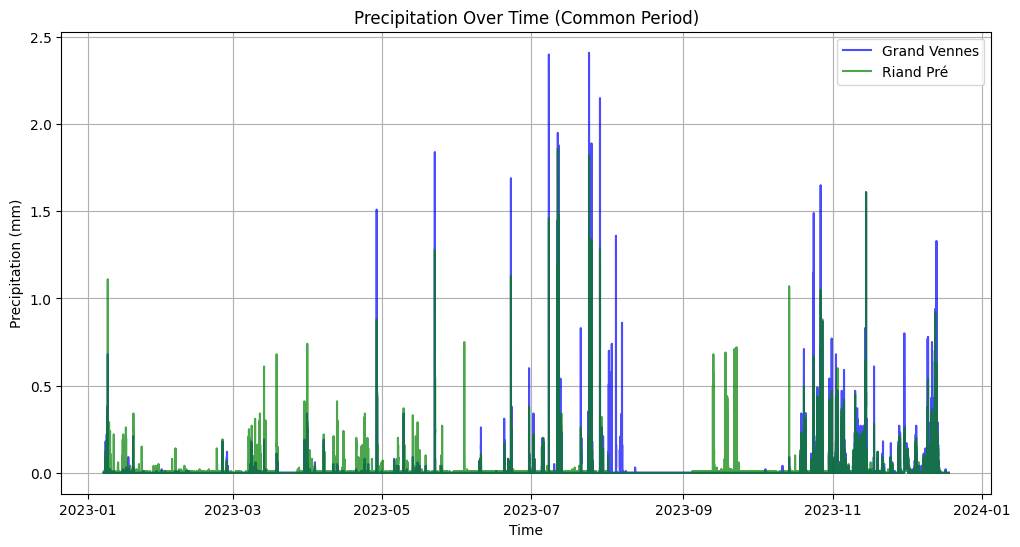

In [17]:
#Finding the common time period between the two datasets
start_time = max(grandvennes.index.min(), riandpre.index.min())
end_time = min(grandvennes.index.max(), riandpre.index.max())

# Filtering both datasets to the common time period
grandvennes_filtered = grandvennes.loc[start_time:end_time]
riandpre_filtered = riandpre.loc[start_time:end_time]

# Converting precipitation from drops to mm (assuming 1 drop = 0.01 mm)
grandvennes_filtered['Precipitation_mm'] = grandvennes_filtered['Precipitation'] * 0.01
riandpre_filtered['Precipitation_mm'] = riandpre_filtered['Precipitation'] * 0.01

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(grandvennes_filtered.index, grandvennes_filtered['Precipitation_mm'], label='Grand Vennes', color='blue', alpha=0.7)
plt.plot(riandpre_filtered.index, riandpre_filtered['Precipitation_mm'], label='Riand Pré', color='green', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Over Time (Common Period)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()